## Chronic Kidney Disease Classification using Machine Learning.
### Author: Oladipupo Esan
### ID: 

## Import dependencies and configure sns

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import pandas as pd
import matplotlib.pyplot as plt
import utils as helper
sns.set_style(style='whitegrid')

In [3]:
kidney = pd.read_csv('kidney_disease.csv')
kidney.head(8)

,id,age,bp,sg,al,su,rbc,pc,pcc,ba,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,...,44,7800,5.2,yes,yes,no,good,no,no,ckd
1,1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,...,38,6000,NaN,no,no,no,good,no,no,ckd
2,2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,...,31,7500,NaN,no,yes,no,poor,no,yes,ckd
3,3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,...,32,6700,3.9,yes,no,no,poor,yes,yes,ckd
4,4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,...,35,7300,4.6,no,no,no,good,no,no,ckd
5,5,60.0,90.0,1.015,3.0,0.0,NaN,NaN,notpresent,notpresent,...,39,7800,4.4,yes,yes,no,good,yes,no,ckd
6,6,68.0,70.0,1.010,0.0,0.0,NaN,normal,notpresent,notpresent,...,36,NaN,NaN,no,no,no,good,no,no,ckd
7,7,24.0,NaN,1.015,2.0,4.0,normal,abnormal,notpresent,notpresent,...,44,6900,5,no,yes,no,good,yes,no,ckd


In [4]:
kidney.dtypes

id                  int64
age               float64
bp                float64
sg                float64
al                float64
su                float64
rbc                object
pc                 object
pcc                object
ba                 object
bgr               float64
bu                float64
sc                float64
sod               float64
pot               float64
hemo              float64
pcv                object
wc                 object
rc                 object
htn                object
dm                 object
cad                object
appet              object
pe                 object
ane                object
classification     object
dtype: object

# Remove Ending Tab Character and converts integer to float

In [5]:
def clas(x):
  if x=='ckd\t':
    return 'ckd'
  else:
    return x

In [6]:
kidney.classification=kidney.classification.apply(clas,convert_dtype=True)
kidney.classification.unique()

/var/folders/gb/2nmhwvxd7lj3jn6nz9sz0z9c0000gp/T/ipykernel_33325/706402113.py:1: FutureWarning: the convert_dtype parameter is deprecated and will be removed in a future version.  Do ``ser.astype(object).apply()`` instead if you want ``convert_dtype=False``.
  kidney.classification=kidney.classification.apply(clas,convert_dtype=True)


array(['ckd', 'notckd'], dtype=object)

In [7]:
kidney.wc=pd.to_numeric(kidney.wc,errors='coerce')
kidney.rc=pd.to_numeric(kidney.rc,errors='coerce')
kidney.pcv=pd.to_numeric(kidney.pcv,errors='coerce')
kidney.head(8)

,id,age,bp,sg,al,su,rbc,pc,pcc,ba,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,...,44.0,7800.0,5.2,yes,yes,no,good,no,no,ckd
1,1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,...,38.0,6000.0,NaN,no,no,no,good,no,no,ckd
2,2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,...,31.0,7500.0,NaN,no,yes,no,poor,no,yes,ckd
3,3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,...,32.0,6700.0,3.9,yes,no,no,poor,yes,yes,ckd
4,4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,...,35.0,7300.0,4.6,no,no,no,good,no,no,ckd
5,5,60.0,90.0,1.015,3.0,0.0,NaN,NaN,notpresent,notpresent,...,39.0,7800.0,4.4,yes,yes,no,good,yes,no,ckd
6,6,68.0,70.0,1.010,0.0,0.0,NaN,normal,notpresent,notpresent,...,36.0,NaN,NaN,no,no,no,good,no,no,ckd
7,7,24.0,NaN,1.015,2.0,4.0,normal,abnormal,notpresent,notpresent,...,44.0,6900.0,5.0,no,yes,no,good,yes,no,ckd


# Count Plot of Chronic and Not Chronic disease

<Axes: xlabel='classification', ylabel='count'>

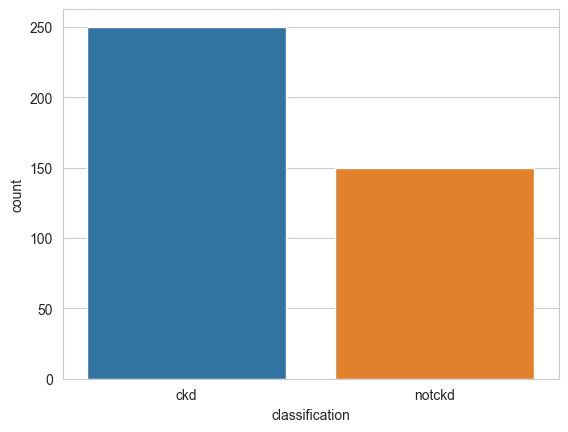

In [8]:
sns.countplot(x='classification',data=kidney, hue='classification')


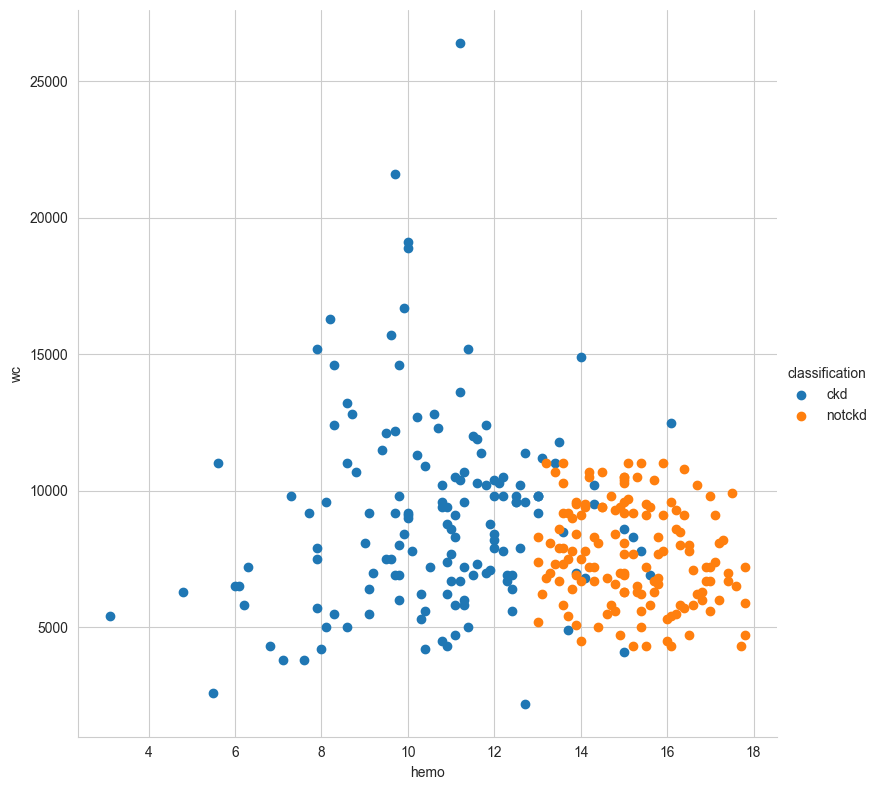

In [9]:

sns.FacetGrid(kidney,hue='classification',height=8) \
   .map(plt.scatter,'hemo','wc') \
   .add_legend()
plt.show()

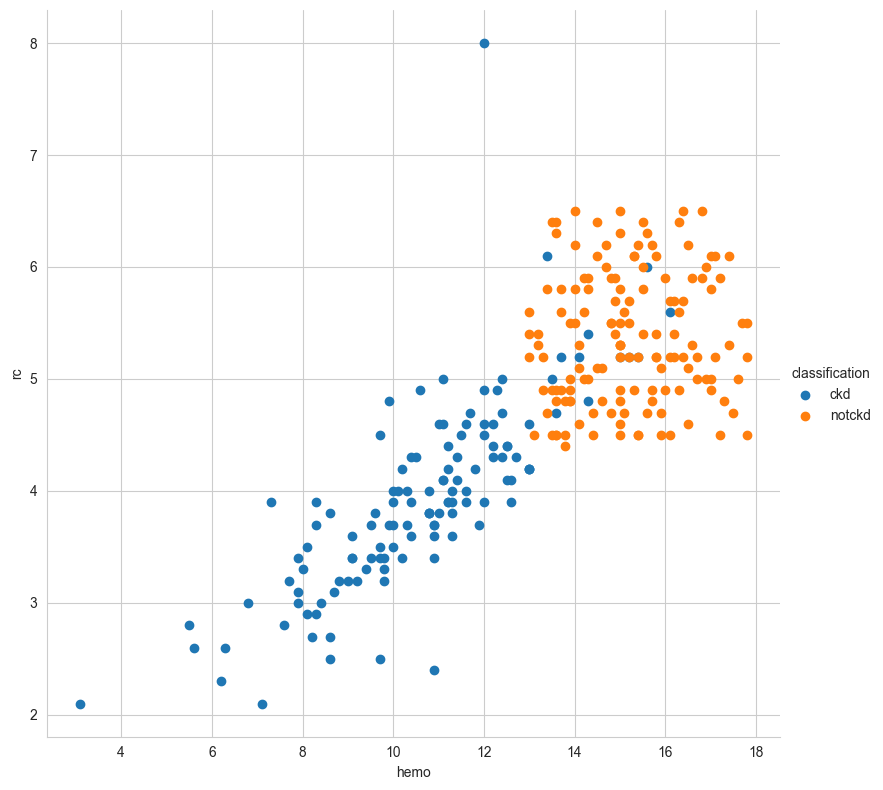

In [10]:

sns.FacetGrid(kidney,hue='classification',height=8) \
   .map(plt.scatter,'hemo','rc') \
   .add_legend()
plt.show()

<Axes: xlabel='bgr', ylabel='wc'>

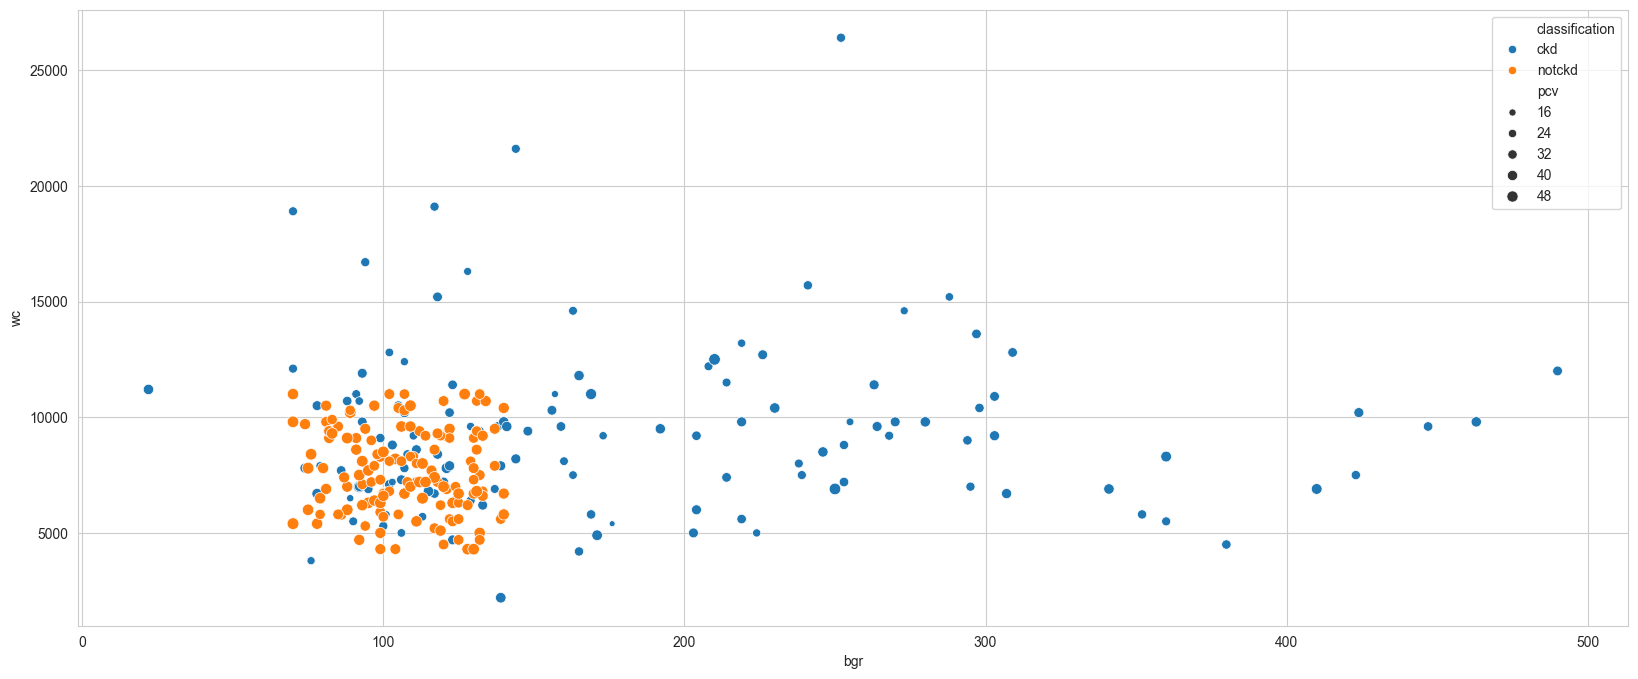

In [11]:
plt.figure(1,figsize=(20,8))
sns.scatterplot(x='bgr',y='wc',hue='classification',data=kidney,size='pcv')


In [12]:
def clas(x):
  if x=='\tno':
    return 'no'
  elif x=='yes':
    return 'yes'
  elif x=='no':
    return 'no'
  else:
    return 'unknown'

In [13]:
kidney.cad.unique()

array(['no', 'yes', '\tno', nan], dtype=object)

In [14]:
kidney.cad=kidney.cad.apply(clas,convert_dtype=True)
kidney.cad.unique()

/var/folders/gb/2nmhwvxd7lj3jn6nz9sz0z9c0000gp/T/ipykernel_33325/1468636467.py:1: FutureWarning: the convert_dtype parameter is deprecated and will be removed in a future version.  Do ``ser.astype(object).apply()`` instead if you want ``convert_dtype=False``.
  kidney.cad=kidney.cad.apply(clas,convert_dtype=True)


array(['no', 'yes', 'unknown'], dtype=object)

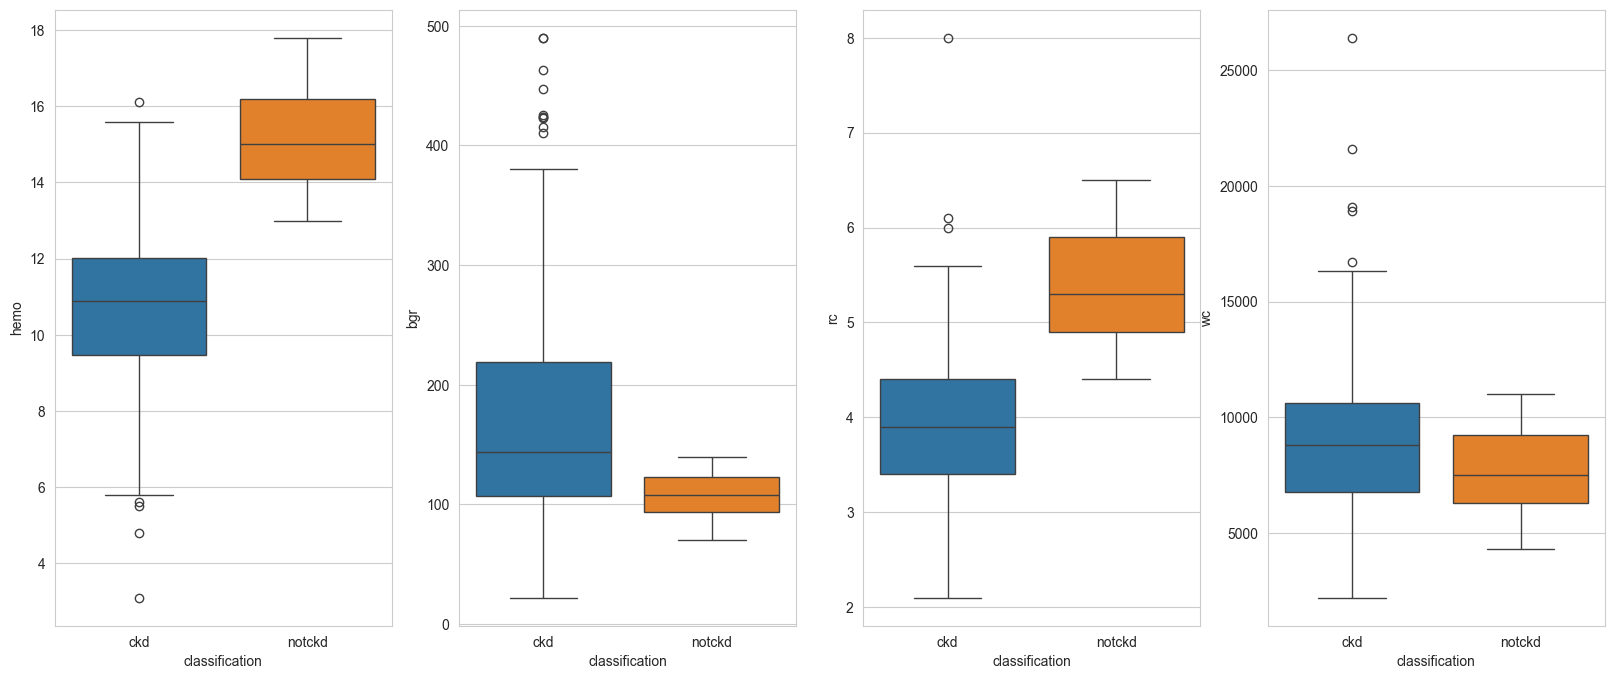

In [15]:
plt.figure(1,figsize=(20,8))
plt.subplot(141)
sns.boxplot(x='classification',y='hemo',data=kidney, hue='classification')
plt.subplot(142)
sns.boxplot(x='classification',y='bgr',data=kidney, hue='classification')
plt.subplot(143)
sns.boxplot(x='classification',y='rc',data=kidney, hue='classification')
plt.subplot(144)
sns.boxplot(x='classification',y='wc',data=kidney, hue='classification')

plt.show()

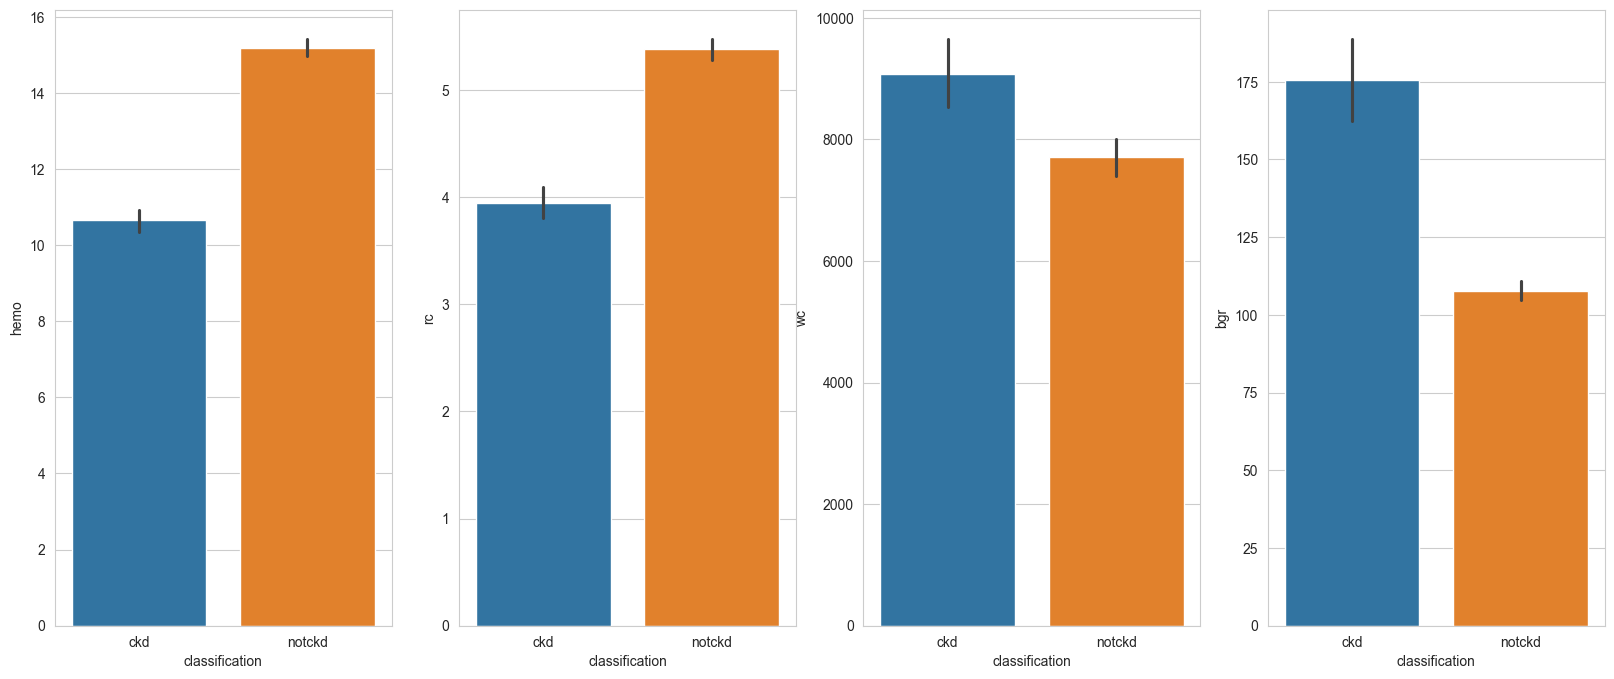

In [16]:
plt.figure(1,figsize=(20,8))
plt.subplot(141)
sns.barplot(x='classification',y='hemo',data=kidney, hue='classification')
plt.subplot(142)
sns.barplot(x='classification',y='rc',data=kidney, hue='classification')
plt.subplot(143)
sns.barplot(x='classification',y='wc',data=kidney, hue='classification')
plt.subplot(144)
sns.barplot(x='classification',y='bgr',data=kidney, hue='classification')
plt.show()

<Axes: xlabel='classification', ylabel='count'>

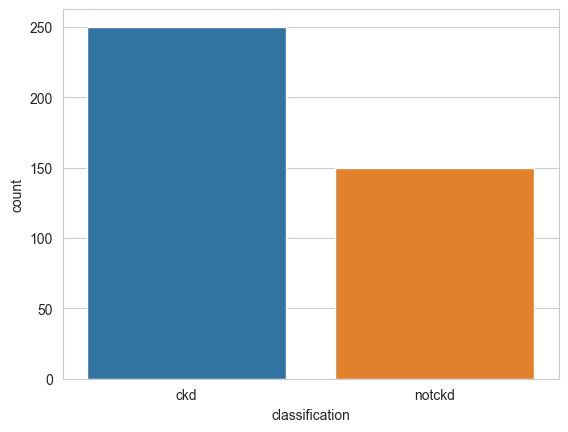

In [17]:
sns.countplot(x='classification',data=kidney, hue='classification')

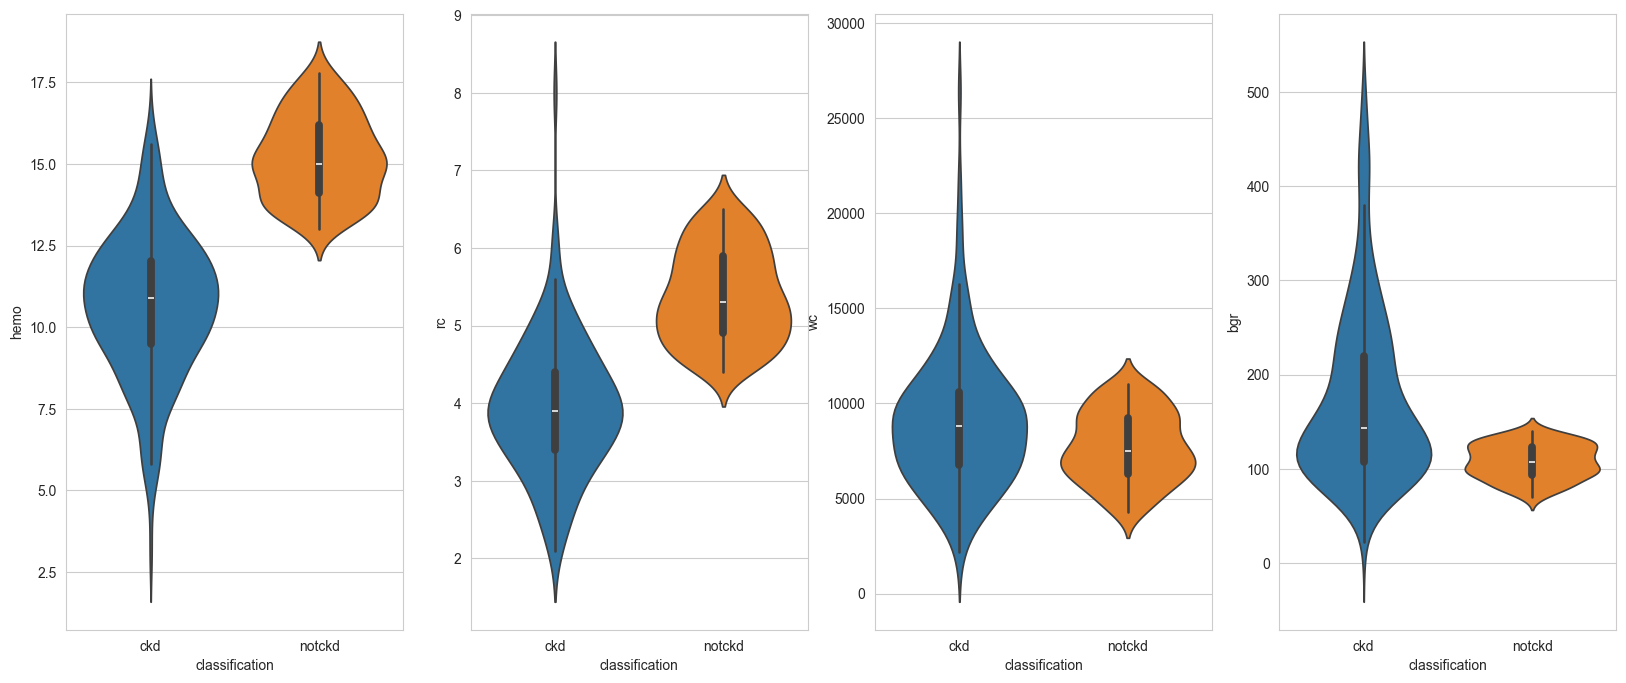

In [18]:
plt.figure(1,figsize=(20,8))
plt.subplot(141)
sns.violinplot(x='classification',y='hemo',data=kidney, hue='classification')
plt.subplot(142)
sns.violinplot(x='classification',y='rc',data=kidney, hue='classification')
plt.subplot(143)
sns.violinplot(x='classification',y='wc',data=kidney, hue='classification')
plt.subplot(144)
sns.violinplot(x='classification',y='bgr',data=kidney, hue='classification')
plt.show()

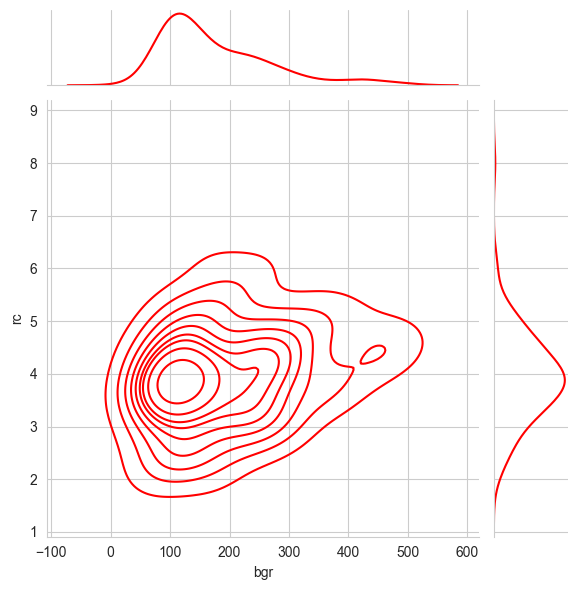

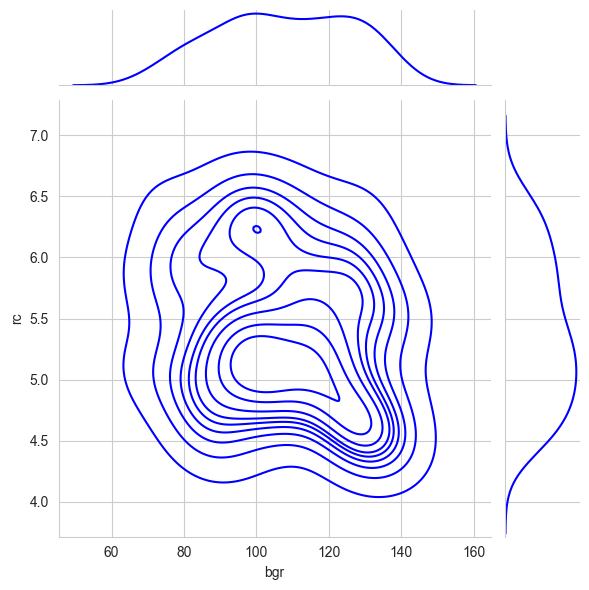

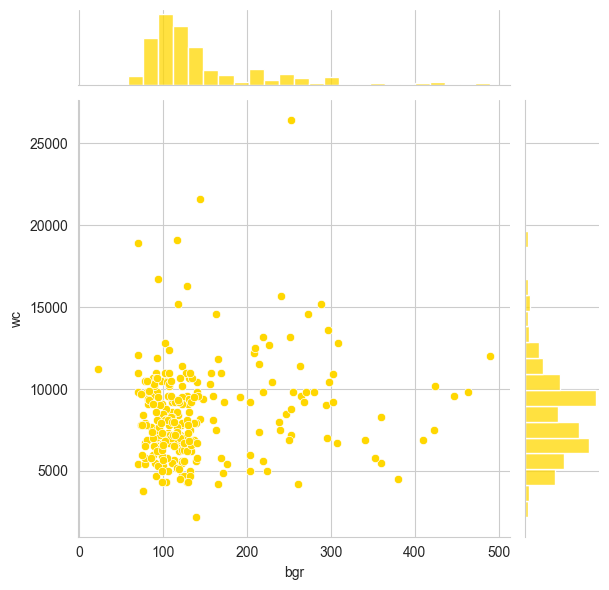

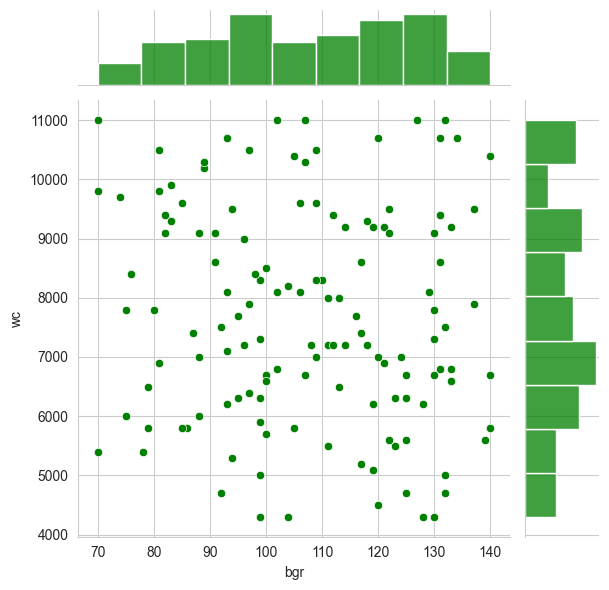

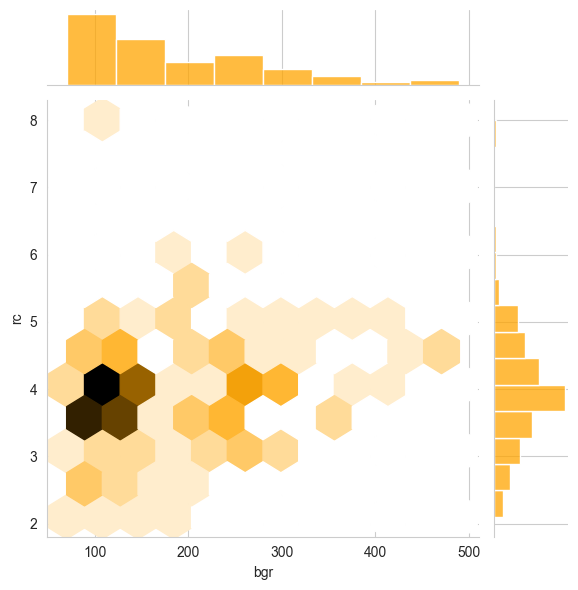

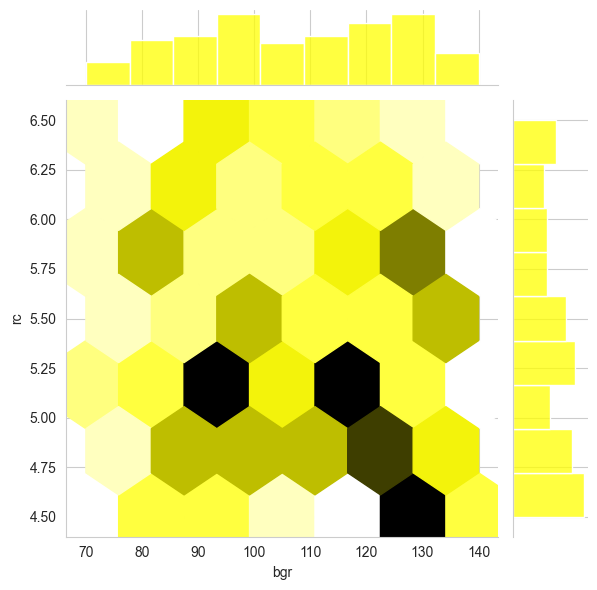

In [19]:

ax=sns.jointplot(x='bgr', y='rc', data=kidney[kidney.classification=='ckd'],kind='kde',height=6,color='r')
ax=sns.jointplot(x='bgr',y='rc',data=kidney[kidney.classification=='notckd'],kind='kde',height=6,color='b')
ax=sns.jointplot(x='bgr',y='wc',data=kidney,kind='scatter',height=6,color='gold')
ax=sns.jointplot(x='bgr',y='wc',data=kidney[kidney.classification=='notckd'],kind='scatter',height=6,color='green')
ax=sns.jointplot(x='bgr',y='rc',data=kidney[kidney.classification=='ckd'],kind='hex',height=6,color='orange')
ax=sns.jointplot(x='bgr',y='rc',data=kidney[kidney.classification=='notckd'],kind='hex',height=6,color='yellow')



In [20]:
fig = px.scatter_3d(kidney, x='rc', z='wc', y='bgr',color='classification',opacity=0.8)
fig.show()

In [21]:
# from mpl_toolkits.mplot3d import Axes3D
# import matplotlib.pyplot as plt

In [22]:
# fig = plt.figure(1,figsize=(18,12))
# ax = fig.add_subplot(111, projection='3d')

# ax.scatter(xs=kidney.rc, ys=kidney.bgr, zs=kidney.wc, c=kidney.classification, marker='o')

# ax.set_xlabel('Red Blood Cells')
# ax.set_ylabel('Blood Glucose Random')
# ax.set_zlabel('White blood cells')

# plt.show()

# Change Classification to Colour

In [23]:
def colorize(x):
    if x=='ckd':
        return 'red'
    elif x=='notckd':
        return 'blue'

In [24]:
kidney.classification=kidney.classification.apply(colorize,convert_dtype=True)
kidney.classification.unique()

/var/folders/gb/2nmhwvxd7lj3jn6nz9sz0z9c0000gp/T/ipykernel_33325/524477469.py:1: FutureWarning:

the convert_dtype parameter is deprecated and will be removed in a future version.  Do ``ser.astype(object).apply()`` instead if you want ``convert_dtype=False``.



array(['red', 'blue'], dtype=object)

In [25]:
kidney.head()

,id,age,bp,sg,al,su,rbc,pc,pcc,ba,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,...,44.0,7800.0,5.2,yes,yes,no,good,no,no,red
1,1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,...,38.0,6000.0,NaN,no,no,no,good,no,no,red
2,2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,...,31.0,7500.0,NaN,no,yes,no,poor,no,yes,red
3,3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,...,32.0,6700.0,3.9,yes,no,no,poor,yes,yes,red
4,4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,...,35.0,7300.0,4.6,no,no,no,good,no,no,red


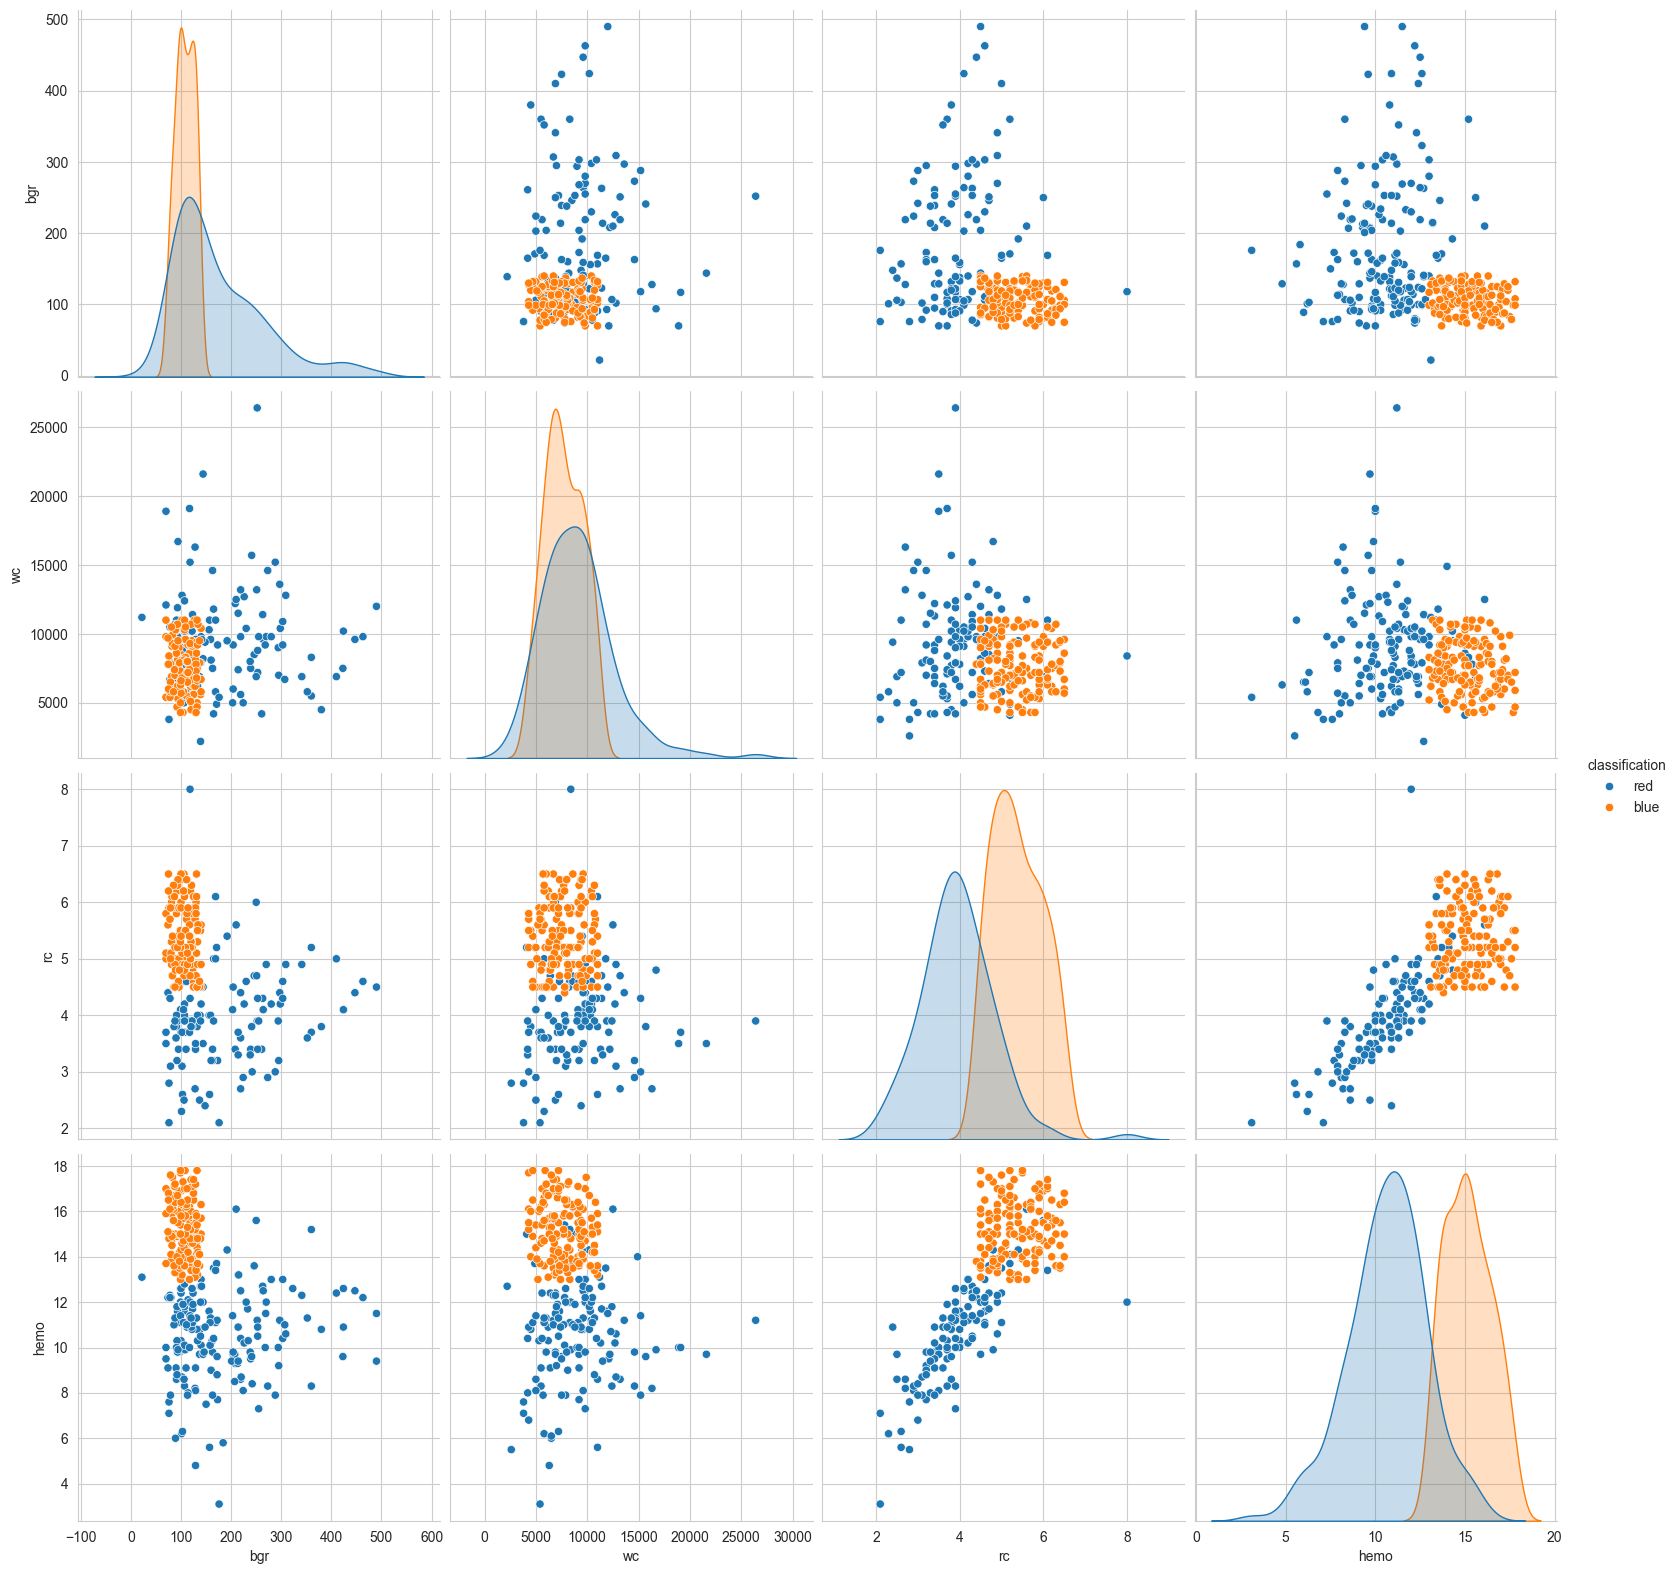

In [26]:
sns.pairplot(kidney[['bgr','wc','rc','classification','hemo']],hue='classification',height=4)

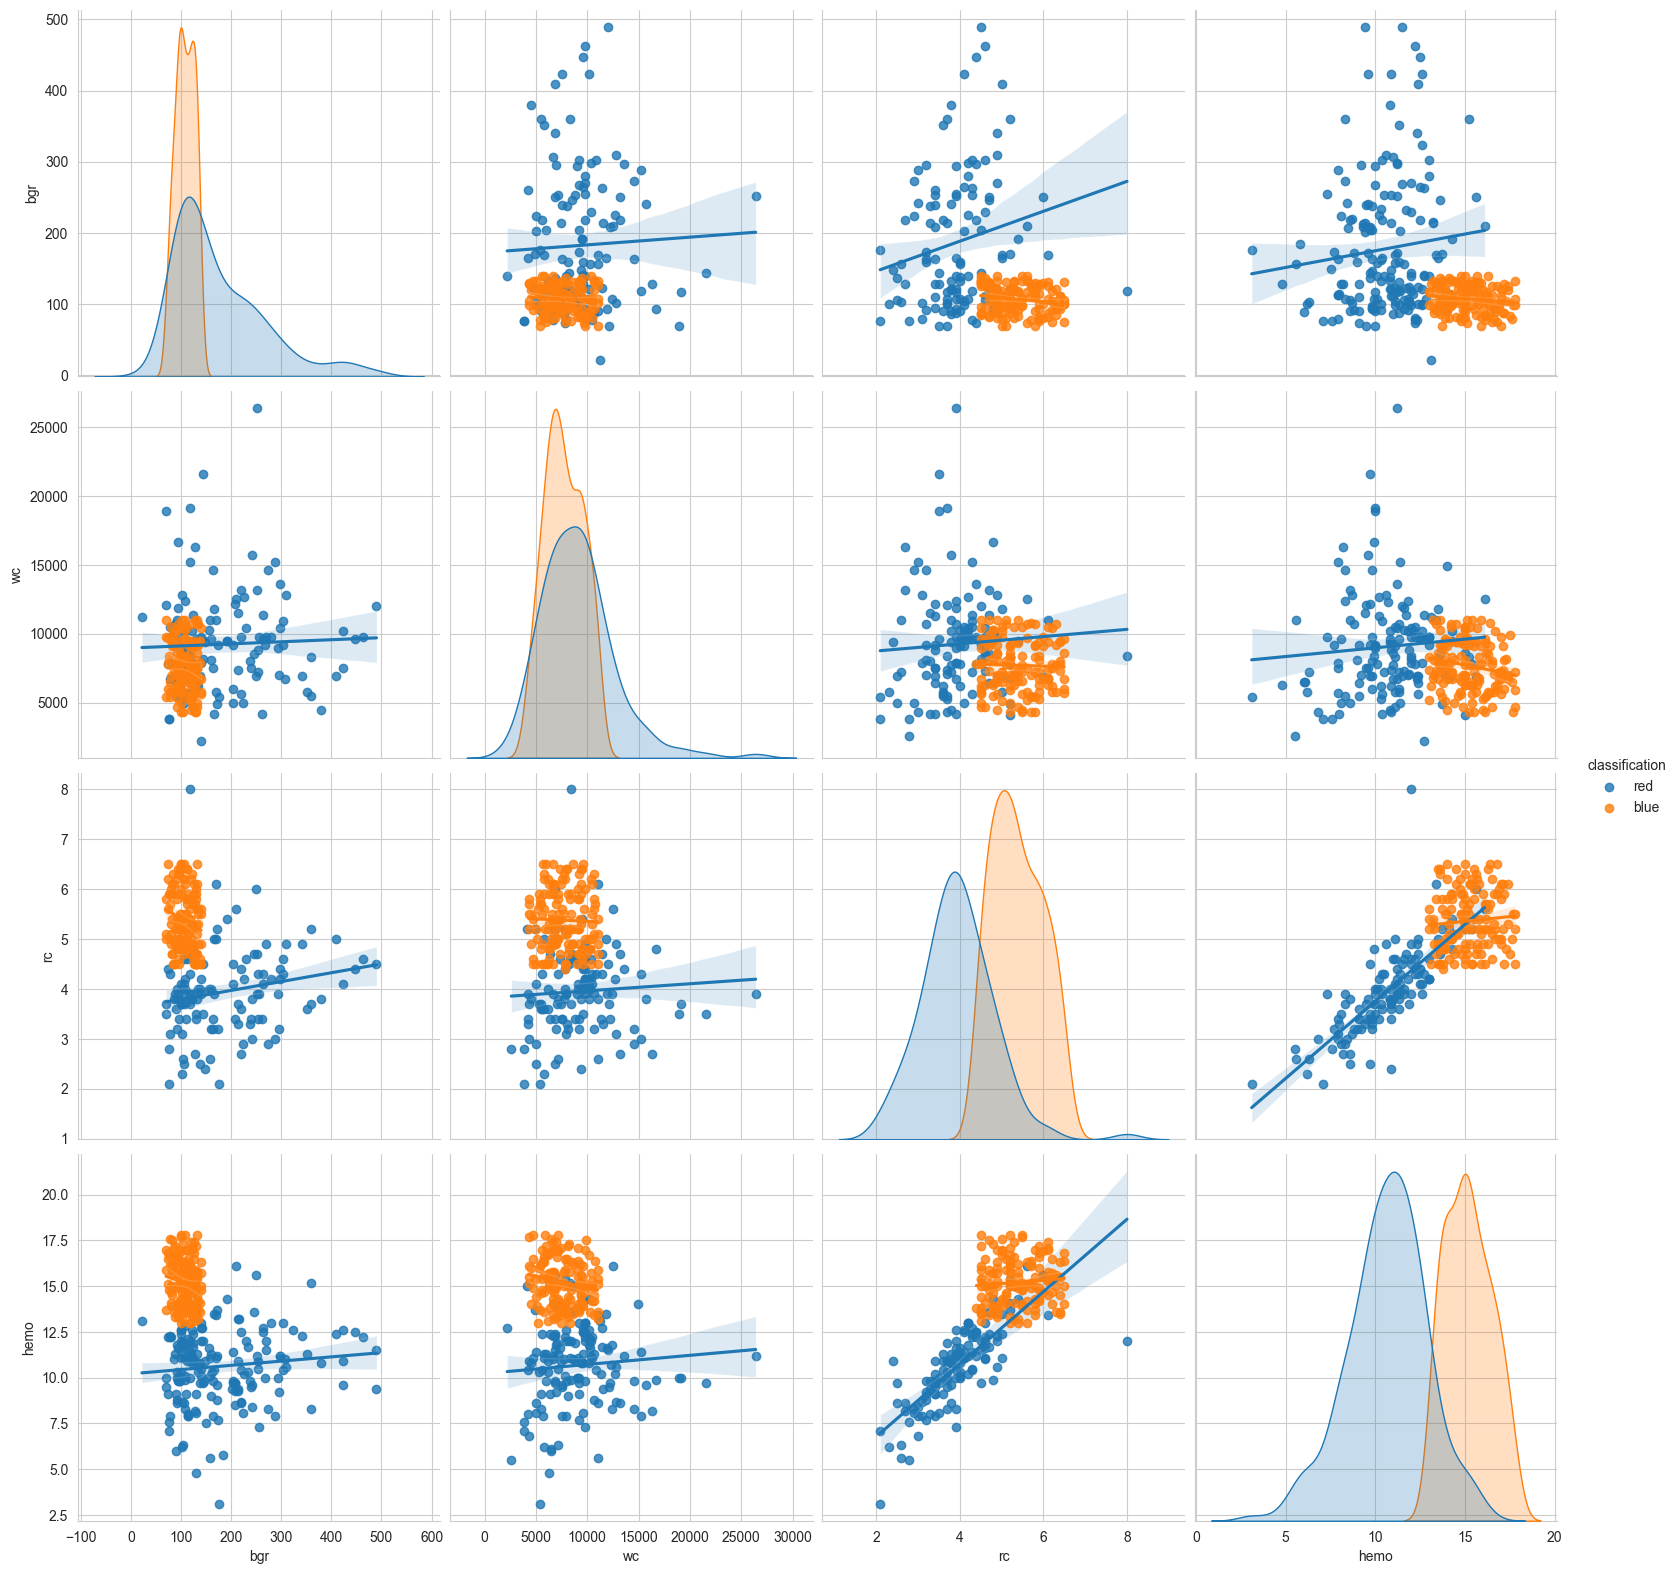

In [27]:
sns.pairplot(kidney[['bgr','wc','rc','classification','hemo']],kind='reg',hue='classification',height=4,dropna=True)

In [28]:
kidney[kidney.classification=='red'][['bgr','wc','rc']].var()


bgr    8.479136e+03
wc     1.282013e+07
rc     7.487371e-01
dtype: float64

In [29]:
kidney[kidney.classification=='blue'][['bgr','wc','rc']].var()

bgr    3.446496e+02
wc     3.384757e+06
rc     3.553314e-01
dtype: float64

In [30]:
kidney[kidney.classification=='red'][['bgr','wc','rc']].describe()

,bgr,wc,rc
count,212.000000,151.000000,126.000000
mean,175.419811,9069.536424,3.945238
std,92.082223,3580.521254,0.865296
min,22.000000,2200.000000,2.100000
25%,106.750000,6750.000000,3.400000
50%,143.500000,8800.000000,3.900000
75%,219.250000,10600.000000,4.400000
max,490.000000,26400.000000,8.000000


In [31]:
kidney[kidney.classification=='blue'][['bgr','wc','rc']].describe()

,bgr,wc,rc
count,144.000000,143.000000,143.000000
mean,107.722222,7705.594406,5.379021
std,18.564740,1839.770968,0.596097
min,70.000000,4300.000000,4.400000
25%,93.750000,6300.000000,4.900000
50%,107.500000,7500.000000,5.300000
75%,123.250000,9250.000000,5.900000
max,140.000000,11000.000000,6.500000


In [32]:
kidney.shape[0]

400

In [33]:
kidney.pcv.unique()

array([44., 38., 31., 32., 35., 39., 36., 33., 29., 28., nan, 16., 24.,
       37., 30., 34., 40., 45., 27., 48., 52., 14., 22., 18., 42., 17.,
       46., 23., 19., 25., 41., 26., 15., 21., 43., 20., 47.,  9., 49.,
       50., 53., 51., 54.])

<center><h1> 
Running PCA and training Machine Learning model to predict chronic and not chronic kidney disease
</h1>
</center>
<center><img src="https://www.magellanic-clouds.com/blocks/wp-content/uploads/2017/01/ml_en.png"></center>

In [34]:
kidney=kidney[['rc','wc','bgr','hemo','pcv','bu','sc','sod','pot','su','al','sg','bp','age','classification']]
kidney_old=kidney.copy()


In [35]:


kidney.head(10)
kidney.classification.unique()

array(['red', 'blue'], dtype=object)

# Coorelation Map

In [36]:
def inter(x):
    if x=='red':
        return 1
    elif x=='blue':
        return 0

/var/folders/gb/2nmhwvxd7lj3jn6nz9sz0z9c0000gp/T/ipykernel_33325/1597954683.py:2: FutureWarning:

the convert_dtype parameter is deprecated and will be removed in a future version.  Do ``ser.astype(object).apply()`` instead if you want ``convert_dtype=False``.



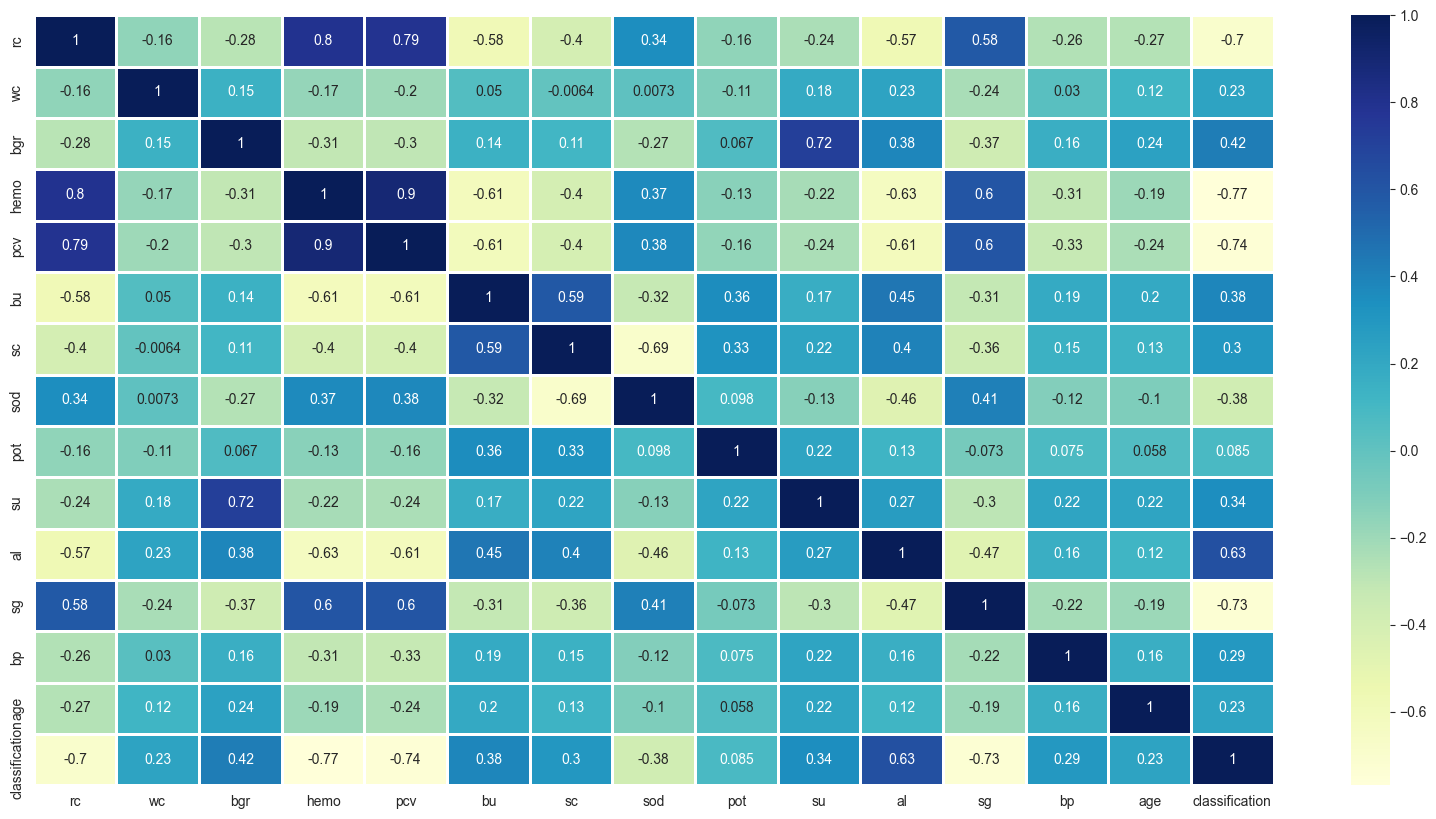

In [37]:
plt.figure(1,figsize=(20,10))
kidney.classification=kidney.classification.apply(inter,convert_dtype=True)
sns.heatmap(kidney.corr(numeric_only=True),annot=True,cmap='YlGnBu',linewidth=0.8)
plt.show()

In [38]:
scaleFeatures = False


kidney = kidney.dropna()


labels = ['red' if i==1 else 'green' for i in kidney.classification]

df = kidney[['bgr', 'wc', 'rc']]


df.head(100)


,bgr,wc,rc
3,117.0,6700.0,3.9
5,74.0,7800.0,4.4
9,70.0,12100.0,3.7
11,380.0,4500.0,3.8
12,208.0,12200.0,3.4
...,...,...,...
266,133.0,6800.0,5.3
267,122.0,9500.0,4.8
269,121.0,6900.0,5.3
270,111.0,7200.0,5.0


In [39]:
df.dtypes

bgr    float64
wc     float64
rc     float64
dtype: object

In [40]:
print(df.var())
print("This is the describe output: ", df.describe())

bgr    5.696682e+03
wc     8.568807e+06
rc     1.002693e+00
dtype: float64
This is the describe output:                bgr            wc          rc
count  203.000000    203.000000  203.000000
mean   138.029557   8592.610837    4.788670
std     75.476369   2927.252383    1.001345
min     70.000000   3800.000000    2.100000
25%     95.500000   6700.000000    4.050000
50%    117.000000   8100.000000    4.800000
75%    133.500000   9800.000000    5.500000
max    490.000000  26400.000000    8.000000


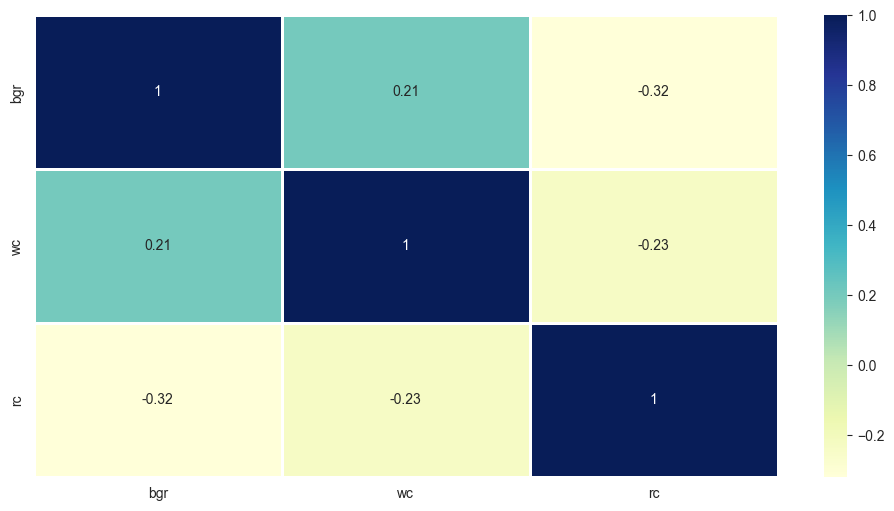

In [41]:
plt.figure(1,figsize=(12,6))
sns.heatmap(df.corr(),annot=True,cmap='YlGnBu',linewidth=0.8)
plt.show()

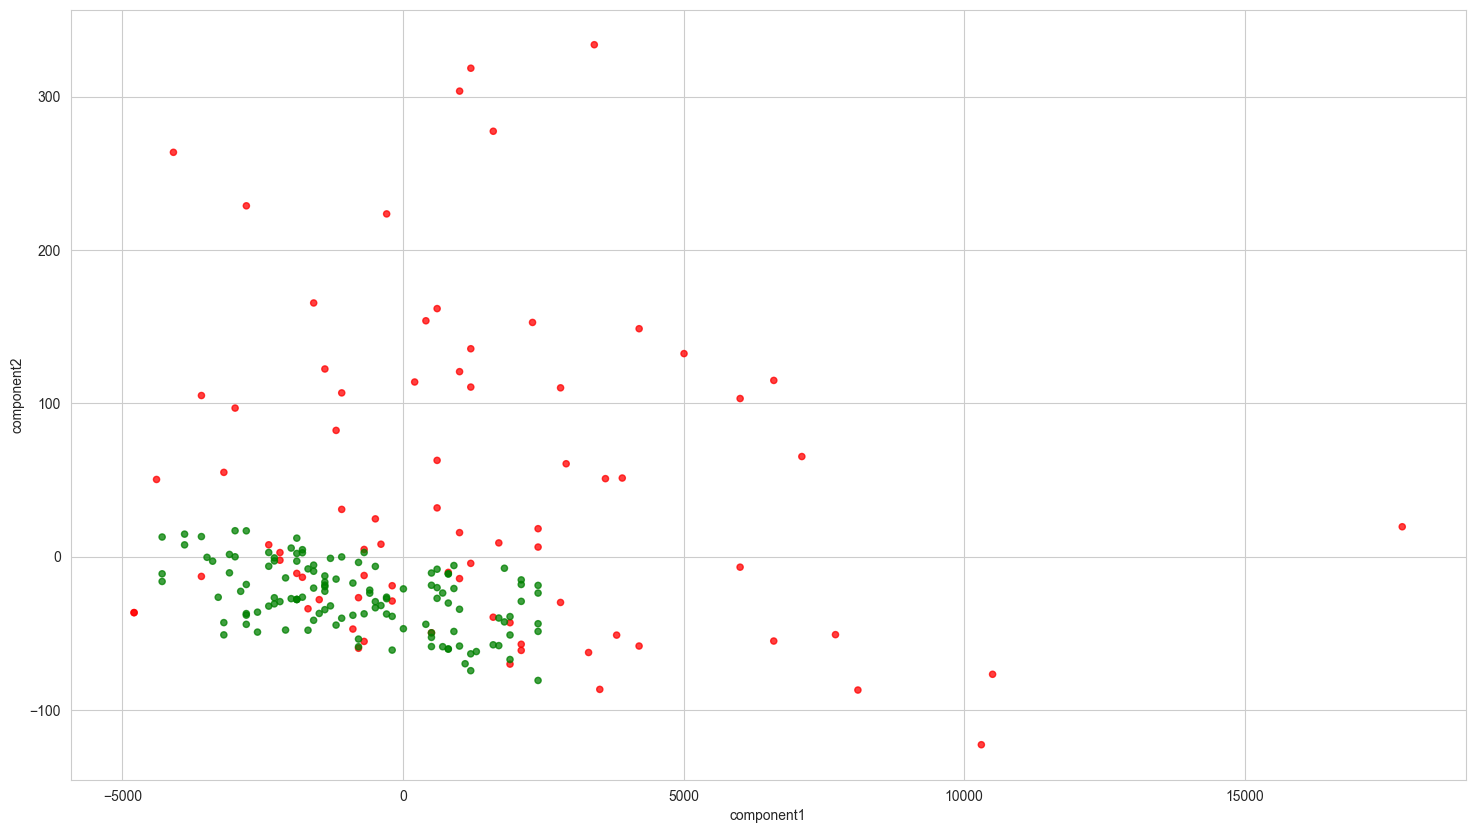

In [42]:

if scaleFeatures: df = helper.scaleFeatures(df)


from sklearn.decomposition import PCA
pca = PCA(n_components = 2)
pca.fit(df)
T = pca.transform(df)

plt.figure(1, figsize=(18,10))
ax = helper.drawVectors(T, pca.components_, df.columns.values, plt, scaleFeatures)
T = pd.DataFrame(T)
T.columns = ['component1', 'component2']
T.plot.scatter(x='component1', y='component2', marker='o', c=labels, alpha=0.75, ax=ax)
plt.show()

In [43]:
T.head(20)

,component1,component2
0,-1892.695723,-10.979333
1,-792.939505,-59.819368
2,3506.978729,-86.642063
3,-4091.268718,263.693590
4,3607.709845,50.825320
5,2407.456111,6.199301
6,-4792.872399,-36.580430
7,2808.012984,110.067350
8,607.566353,31.751526
9,-1692.815276,-34.038629


# Data Training

In [44]:
kidney_old.head()
kidney=kidney_old.copy()
print(kidney.classification)

0       red
1       red
2       red
3       red
4       red
       ... 
395    blue
396    blue
397    blue
398    blue
399    blue
Name: classification, Length: 400, dtype: object


In [45]:
def cl(x):
  if x=='red':
    return 1
  elif x=='blue':
    return 0

In [46]:
kidney.classification=kidney.classification.apply(cl,convert_dtype=True)

/var/folders/gb/2nmhwvxd7lj3jn6nz9sz0z9c0000gp/T/ipykernel_33325/2001635067.py:1: FutureWarning:

the convert_dtype parameter is deprecated and will be removed in a future version.  Do ``ser.astype(object).apply()`` instead if you want ``convert_dtype=False``.



In [47]:
kidney.dtypes

rc                float64
wc                float64
bgr               float64
hemo              float64
pcv               float64
bu                float64
sc                float64
sod               float64
pot               float64
su                float64
al                float64
sg                float64
bp                float64
age               float64
classification      int64
dtype: object

In [48]:
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

In [49]:
clean_data=kidney.copy()

In [50]:
y=clean_data[['classification']].copy()

In [51]:
y.head()

,classification
0,1
1,1
2,1
3,1
4,1


In [52]:
kidney.columns

Index(['rc', 'wc', 'bgr', 'hemo', 'pcv', 'bu', 'sc', 'sod', 'pot', 'su', 'al',
       'sg', 'bp', 'age', 'classification'],
      dtype='object')

In [53]:
X = clean_data[['rc', 'wc', 'bgr', 'hemo', 'pcv', 'bu', 'sc', 'sod', 'pot', 'su', 'al',
       'sg', 'bp', 'age']].copy()

In [54]:
X.head()

,rc,wc,bgr,hemo,pcv,bu,sc,sod,pot,su,al,sg,bp,age
0,5.2,7800.0,121.0,15.4,44.0,36.0,1.2,NaN,NaN,0.0,1.0,1.020,80.0,48.0
1,NaN,6000.0,NaN,11.3,38.0,18.0,0.8,NaN,NaN,0.0,4.0,1.020,50.0,7.0
2,NaN,7500.0,423.0,9.6,31.0,53.0,1.8,NaN,NaN,3.0,2.0,1.010,80.0,62.0
3,3.9,6700.0,117.0,11.2,32.0,56.0,3.8,111.0,2.5,0.0,4.0,1.005,70.0,48.0
4,4.6,7300.0,106.0,11.6,35.0,26.0,1.4,NaN,NaN,0.0,2.0,1.010,80.0,51.0


In [55]:
X.shape

(400, 14)

In [56]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5,random_state=324)

In [57]:
print(type(X_train))
print(type(X_test))
print(type(y_train))
print(type(y_test))


y_train.describe()

<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.frame.DataFrame'>


,classification
count,200.000000
mean,0.620000
std,0.486604
min,0.000000
25%,0.000000
50%,1.000000
75%,1.000000
max,1.000000


In [58]:
X_train.head()

,rc,wc,bgr,hemo,pcv,bu,sc,sod,pot,su,al,sg,bp,age
262,5.4,7200.0,118.0,15.5,43.0,18.0,0.9,135.0,3.6,0.0,0.0,1.02,80.0,55.0
207,4.6,10400.0,230.0,12.0,41.0,50.0,2.2,NaN,NaN,0.0,0.0,1.01,70.0,50.0
138,NaN,NaN,95.0,NaN,NaN,51.0,1.6,142.0,3.5,0.0,1.0,1.01,NaN,73.0
176,3.9,12400.0,107.0,8.3,23.0,40.0,1.7,125.0,3.5,0.0,4.0,1.01,90.0,21.0
196,3.5,9600.0,129.0,8.1,24.0,158.0,11.8,122.0,3.2,0.0,3.0,1.01,100.0,49.0


In [59]:
X_train.shape

(200, 14)

In [60]:
y_train.shape

(200, 1)

In [61]:
kidney_classifier = DecisionTreeClassifier(max_leaf_nodes=10, random_state=0)
kidney_classifier.fit(X_train, y_train)

DecisionTreeClassifier(max_leaf_nodes=10, random_state=0)

In [62]:
type(kidney_classifier)

sklearn.tree._classes.DecisionTreeClassifier

In [63]:
predictions = kidney_classifier.predict(X_test)

In [64]:
predictions[:10]

array([1, 1, 0, 1, 0, 1, 1, 1, 1, 0])

In [65]:
y_test['classification'][:10]

228    1
249    1
353    0
51     1
397    0
111    1
42     1
163    1
73     1
268    0
Name: classification, dtype: int64

In [66]:
accuracy_score(y_true = y_test, y_pred = predictions)

0.96